In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2019-06-22 23:43:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  28.1KB/s    in 1.2s    

2019-06-22 23:43:21 (28.1 KB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [11]:
df=pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [12]:
df=df.drop('Address',axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [15]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [25]:
k_means=KMeans(init="k-means++",n_clusters=4,n_init=15).fit(X)
k_means_labels = k_means.labels_
print(labels)

[1 0 2 1 3 2 2 2 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1 2 0 2 1 1 2 1 0 2 1 1 1 1 1
 1 1 0 1 0 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 0 1
 1 1 2 1 0 2 2 2 0 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 0 2 2 1 2 1 1 2 2 2
 1 1 1 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 0 0 1 2 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 0 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 3 1 0 1 1 1 1 2 1 3 0 1 1 2 2 2 1 1 2 2 2 2 1 0
 1 1 1 1 0 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 0 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 2 2 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 0 0 1 0 1 2 1 0 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2 1 1 0 2 2 0 1
 1 2 1 1 2 1 2 1 2 1 1 2 1 1 2 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 2 1 2 0 0 2
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1
 2 0 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 2 2 2 1 1 3
 2 1 2 2 2 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 2 0 2 1 2 1 1 1 2
 1 2 1 1 1 1 0 1 1 1 2 1 

In [23]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[4.34166667e+01, 2.18333333e+00, 1.94833333e+01, 1.23400000e+02,
        3.83666667e+00, 7.34046667e+00, 8.33333333e-02, 9.03666667e+00],
       [3.20500894e+01, 1.61180680e+00, 5.44543828e+00, 2.80483005e+01,
        9.30440072e-01, 1.89666905e+00, 2.46869410e-01, 1.01228980e+01],
       [3.97647059e+01, 1.80542986e+00, 1.29230769e+01, 6.28144796e+01,
        2.31285520e+00, 4.44587783e+00, 1.67420814e-01, 1.06918552e+01],
       [4.66000000e+01, 2.30000000e+00, 2.12000000e+01, 2.70900000e+02,
        7.88400000e+00, 1.33752000e+01, 3.00000000e-01, 8.21000000e+00]])

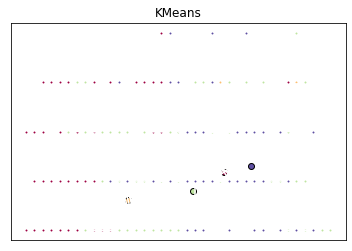

In [26]:
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
